In [17]:
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns


from utils.get_sample_size import get_sample_size as gss
from utils.get_groups import get_groups as gg
from utils.change_value import change_value as cv
from utils.get_columns import get_columns as gc

In [2]:
# caminho do arquivo e carregamento como um dataframe
df_path = '../data/form-games.xlsx'
df = pd.read_excel(df_path)
df

,ID,Qual seu gênero?,Qual sua idade?,Qual seu curso?,Qual o seu Período,De que forma você acredita que os jogos afetam sua vida social?,"Você acredita que jogar interfere positivamente ou negativamente nas suas atividades diárias, como estudo, trabalho ou sono?",Quantas horas você costuma estudar por dia? (Nos dias que estuda),Você tem o costume de jogar algum jogo eletrônico?,Em que plataforma costuma/prefere jogar?,Quais destes gêneros de jogos você já jogou?,Quantas horas você joga por dia? (Nos dias que joga),Você utiliza jogos como uma forma de escapar de situações estressantes ou problemas?
0,1,Masculino,19,Engenharia de Software,6,Negativamente,Interfere negativamente,2,Sim,Computador,Ação;Aventura;RPG;FPS;,4.0,Sim
1,2,Masculino,19,Engenharia de Software,6,Indiferente,Interfere positivamente,2,Sim,Computador,Ação;Aventura;RPG;Esportes;FPS;MMO;,3.0,Às vezes
2,3,Masculino,20,Engenharia de Software,6,Positivamente,Interfere positivamente,3,Sim,Console,Ação;Aventura;RPG;Esportes;FPS;MMO;,2.0,Sim
3,4,Masculino,20,Engenharia de Software,6,Indiferente,Indiferente,1,As vezes,Computador,Ação;Aventura;RPG;FPS;MMO;,1.0,Às vezes
4,5,Masculino,29,Engenharia de Software,7,Positivamente,Interfere muito positivamente,2,As vezes,Computador,RPG;MMO;FPS;,4.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,Masculino,47,Administração,5,Indiferente,Interfere negativamente,3,As vezes,Celular,Aventura;Esportes;,2.0,Sim
61,62,Feminino,34,Administração,5,Positivamente,Indiferente,1,Não,NaN,NaN,NaN,NaN
62,63,Feminino,30,Administração,5,Indiferente,Interfere negativamente,2,As vezes,Celular,Jogos de lógica;,2.0,Sim
63,64,Feminino,20,Publicidade e Propaganda,6,Positivamente,Interfere negativamente,4,As vezes,Celular,Ação;Aventura;,1.0,Sim


In [3]:
# estatística descritiva
df.describe()

,ID,Qual sua idade?,Qual o seu Período,Quantas horas você costuma estudar por dia? (Nos dias que estuda),Quantas horas você joga por dia? (Nos dias que joga)
count,65.00000,65.000000,65.000000,65.000000,59.000000
mean,33.00000,22.876923,6.076923,3.076923,2.788136
std,18.90767,4.979670,1.796765,1.796765,1.822284
min,1.00000,17.000000,2.000000,1.000000,1.000000
25%,17.00000,20.000000,5.000000,2.000000,1.750000
50%,33.00000,21.000000,6.000000,3.000000,2.000000
75%,49.00000,24.000000,8.000000,4.000000,4.000000
max,65.00000,47.000000,10.000000,8.000000,8.000000


In [4]:
# Obtendo o tamanho da amostra com base no nível de confiança e margem de erro desejada
df_size = len(df)
sample_size = gss(1.96, 0.5, 0.05, df_size)

In [5]:
# Amostragem aleatória simples
df_sample = df.sample(n=sample_size)
df_sample

,ID,Qual seu gênero?,Qual sua idade?,Qual seu curso?,Qual o seu Período,De que forma você acredita que os jogos afetam sua vida social?,"Você acredita que jogar interfere positivamente ou negativamente nas suas atividades diárias, como estudo, trabalho ou sono?",Quantas horas você costuma estudar por dia? (Nos dias que estuda),Você tem o costume de jogar algum jogo eletrônico?,Em que plataforma costuma/prefere jogar?,Quais destes gêneros de jogos você já jogou?,Quantas horas você joga por dia? (Nos dias que joga),Você utiliza jogos como uma forma de escapar de situações estressantes ou problemas?
31,32,Masculino,22,Administração,7,Positivamente,Interfere negativamente,3,Sim,Portáteis,MMO;Aventura;RPG;,1.0,Sim
3,4,Masculino,20,Engenharia de Software,6,Indiferente,Indiferente,1,As vezes,Computador,Ação;Aventura;RPG;FPS;MMO;,1.0,Às vezes
5,6,Masculino,19,Fisioterapia,6,Muito negativamente,Interfere muito negativamente,6,Sim,Computador,RPG;MMO;,4.0,Sim
54,55,Feminino,23,Engenharia Civil,10,Positivamente,Interfere negativamente,5,Sim,Computador,Aventura;Ação;,2.0,Às vezes
45,46,Feminino,25,Administração,7,Indiferente,Indiferente,3,Sim,Celular,Aventura;,1.0,Sim
61,62,Feminino,34,Administração,5,Positivamente,Indiferente,1,Não,NaN,NaN,NaN,NaN
49,50,Masculino,22,Agronomia,10,Positivamente,Indiferente,2,Sim,Console,FPS;,4.0,Às vezes
20,21,Masculino,23,Engenharia de Software,8,Positivamente,Indiferente,2,As vezes,Computador,RPG;Aventura;,2.0,Às vezes
2,3,Masculino,20,Engenharia de Software,6,Positivamente,Interfere positivamente,3,Sim,Console,Ação;Aventura;RPG;Esportes;FPS;MMO;,2.0,Sim
52,53,Masculino,20,Arquitetura e Urbanismo,8,Indiferente,Interfere negativamente,4,As vezes,Celular,RPG;,2.0,Sim


In [6]:
# salvar a estatistica descritiva
df_sample.describe().to_excel('../data/form-games-describe.xlsx')
# estatística descritiva do novo df
df_sample.describe()

,ID,Qual sua idade?,Qual o seu Período,Quantas horas você costuma estudar por dia? (Nos dias que estuda),Quantas horas você joga por dia? (Nos dias que joga)
count,56.000000,56.000000,56.000000,56.000000,51.000000
mean,33.196429,22.464286,5.875000,3.107143,2.715686
std,19.490249,4.790006,1.737945,1.754771,1.750014
min,1.000000,17.000000,2.000000,1.000000,1.000000
25%,16.250000,20.000000,5.000000,2.000000,1.750000
50%,34.500000,21.000000,6.000000,3.000000,2.000000
75%,48.500000,23.250000,7.000000,4.000000,4.000000
max,65.000000,47.000000,10.000000,8.000000,8.000000


In [8]:
# removendo valore nan
df_sample = df_sample.dropna()
columns = gc(df_sample)

# novos valores
column = columns[6]

df_sample = cv(df_sample, column)
df_sample.to_excel('../data/form-games-sample.xlsx', index=False)
df_sample

,ID,Qual seu gênero?,Qual sua idade?,Qual seu curso?,Qual o seu Período,De que forma você acredita que os jogos afetam sua vida social?,"Você acredita que jogar interfere positivamente ou negativamente nas suas atividades diárias, como estudo, trabalho ou sono?",Quantas horas você costuma estudar por dia? (Nos dias que estuda),Você tem o costume de jogar algum jogo eletrônico?,Em que plataforma costuma/prefere jogar?,Quais destes gêneros de jogos você já jogou?,Quantas horas você joga por dia? (Nos dias que joga),Você utiliza jogos como uma forma de escapar de situações estressantes ou problemas?
31,32,Masculino,22,Administração,7,Positivamente,Interfere negativamente,3,Sim,Portáteis,MMO;Aventura;RPG;,1.0,Sim
3,4,Masculino,20,Engenharia de Software,6,Indiferente,Indiferente,1,As vezes,Computador,Ação;Aventura;RPG;FPS;MMO;,1.0,Às vezes
5,6,Masculino,19,Fisioterapia,6,Muito negativamente,Interfere negativamente,6,Sim,Computador,RPG;MMO;,4.0,Sim
54,55,Feminino,23,Engenharia Civil,10,Positivamente,Interfere negativamente,5,Sim,Computador,Aventura;Ação;,2.0,Às vezes
45,46,Feminino,25,Administração,7,Indiferente,Indiferente,3,Sim,Celular,Aventura;,1.0,Sim
49,50,Masculino,22,Agronomia,10,Positivamente,Indiferente,2,Sim,Console,FPS;,4.0,Às vezes
20,21,Masculino,23,Engenharia de Software,8,Positivamente,Indiferente,2,As vezes,Computador,RPG;Aventura;,2.0,Às vezes
2,3,Masculino,20,Engenharia de Software,6,Positivamente,Interfere positivamente,3,Sim,Console,Ação;Aventura;RPG;Esportes;FPS;MMO;,2.0,Sim
52,53,Masculino,20,Arquitetura e Urbanismo,8,Indiferente,Interfere negativamente,4,As vezes,Celular,RPG;,2.0,Sim
34,35,Masculino,20,Nutrição,5,Positivamente,Interfere negativamente,3,Sim,Computador,RPG;MMO;Aventura;Ação;,2.0,Sim


In [10]:
# realizando o teste t
group_list = gg(df_sample)
t_stat, p_value = stats.ttest_ind(group_list[0], group_list[1], equal_var=False)

# resultado
alpha = 0.05
print(f"Estatística t: {t_stat}, p-valor: {p_value}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa nas horas de jogo.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa nas horas de jogo.")

Estatística t: -0.3741636657542403, p-valor: 0.7116490689861905
Não rejeitamos a hipótese nula: não há diferença significativa nas horas de jogo.


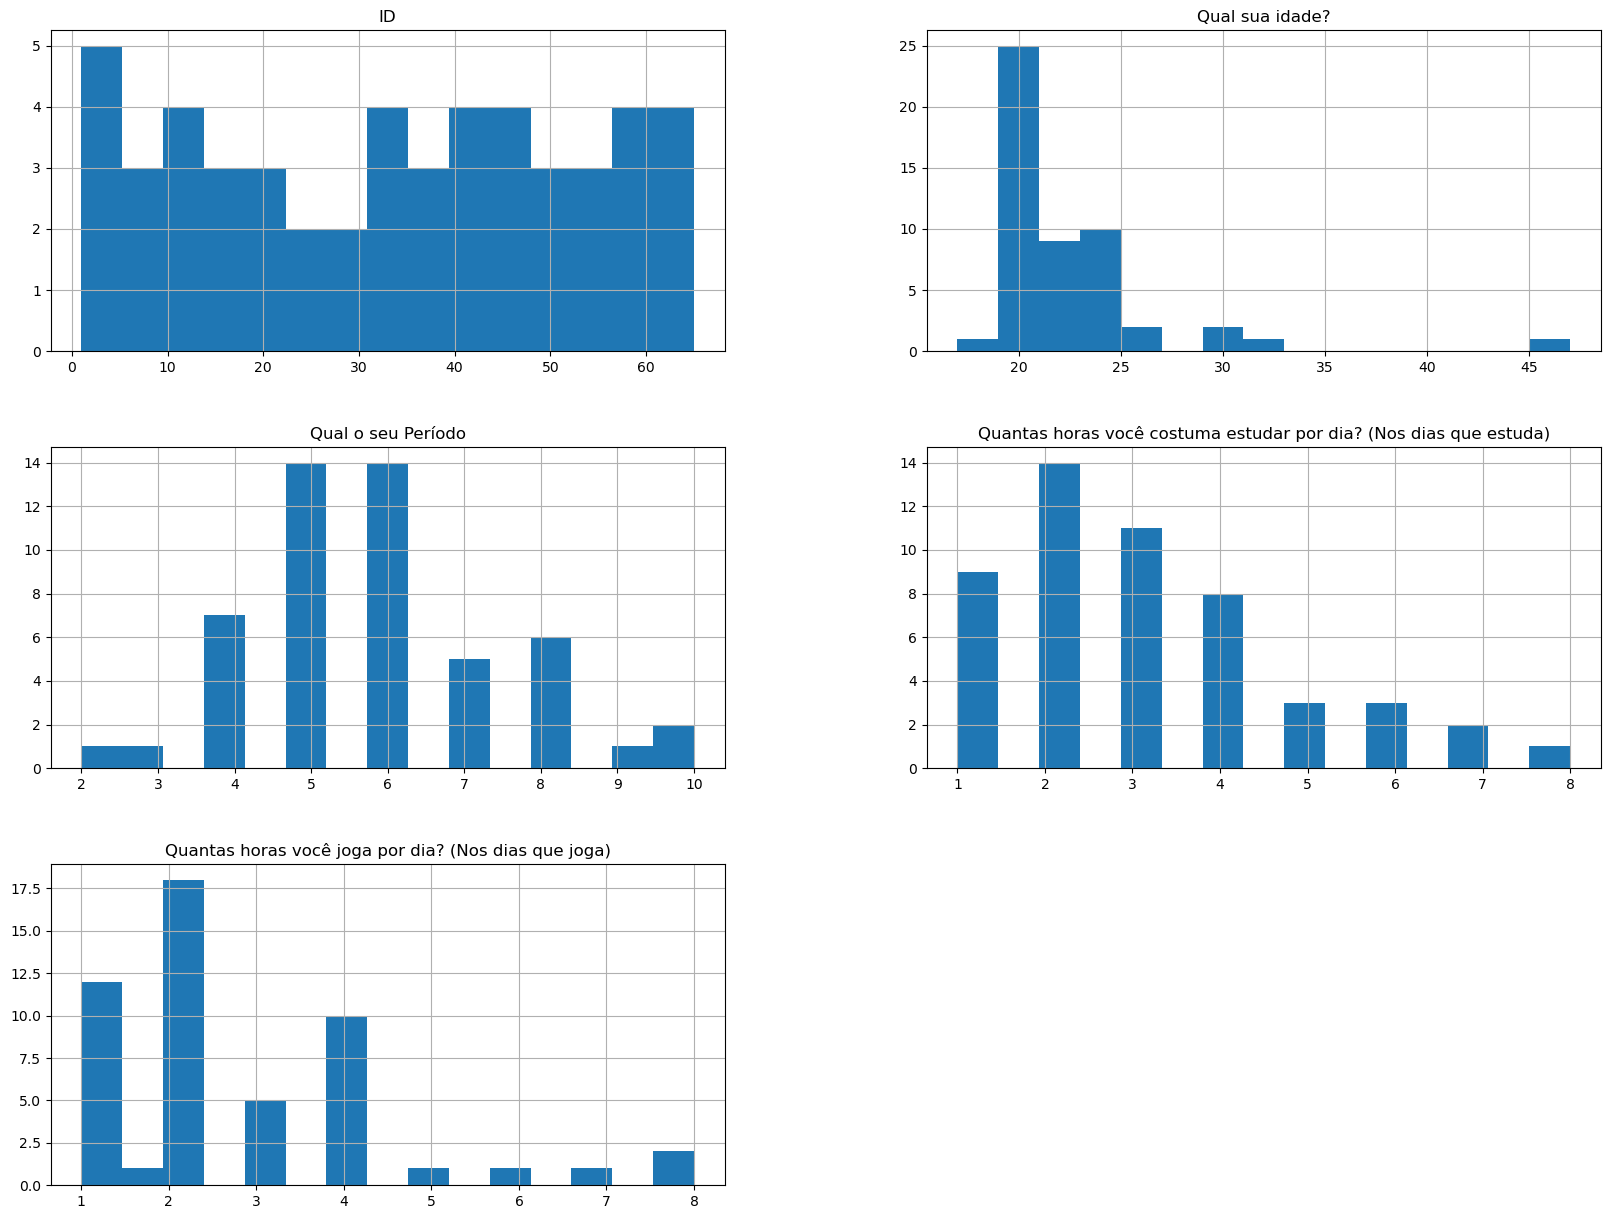

In [11]:
# gráficos de cada coluna
df_sample.hist(bins=15, figsize=(20, 15))
plt.show()

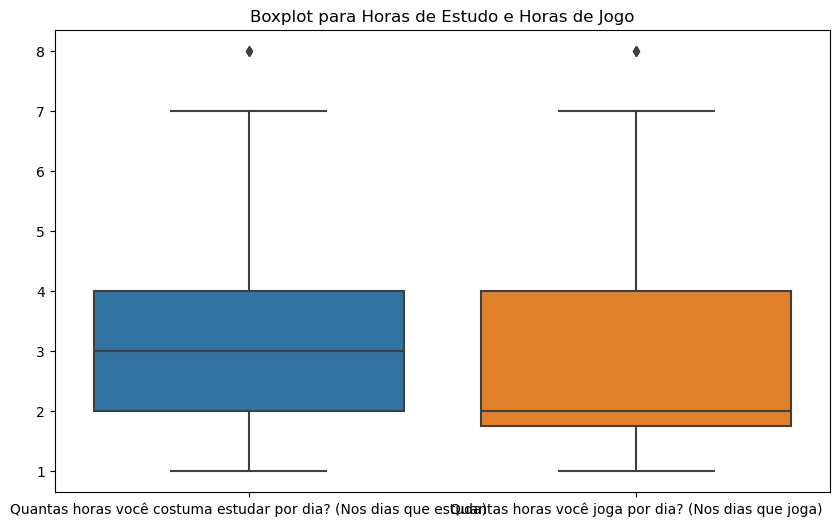

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[[columns[7], columns[11]]])
plt.title('Boxplot para Horas de Estudo e Horas de Jogo')
plt.show()

In [ ]:
# correlação de pearson
c_pearson, p_valor = pearsonr(df[columns[7]], df[columns[11]])

In [18]:
print(columns)

['ID', 'Qual seu gênero?', 'Qual sua idade?', 'Qual seu curso?', 'Qual o seu Período', 'De que forma você acredita que os jogos afetam sua vida social?\xa0', 'Você acredita que jogar interfere positivamente ou negativamente nas suas atividades diárias, como estudo, trabalho ou sono?', 'Quantas horas você costuma estudar por dia? (Nos dias que estuda)', 'Você tem o costume de jogar algum jogo eletrônico?', 'Em que plataforma costuma/prefere jogar?', 'Quais destes gêneros de jogos você já jogou?', 'Quantas horas você joga por dia? (Nos dias que joga)', 'Você utiliza jogos como uma forma de escapar de situações estressantes ou problemas?\xa0']
